# JanataHack: Recommendation Systems


Insights about the dataset

- Your client is a fast-growing mobile platform, for hosting coding challenges. They have a unique business model, where they crowdsource problems from various creators(authors). These authors create the problem and release it on the client's platform. The users then select the challenges they want to solve. The authors make money based on the level of difficulty of their problems and how many users take up their challenge.


- The client, on the other hand makes money when the users can find challenges of their interest and continue to stay on the platform. Till date, the client has relied on its domain expertise, user interface and experience with user behaviour to suggest the problems a user might be interested in. You have now been appointed as the data scientist who needs to come up with the algorithm to keep the users engaged on the platform.

- The client has provided you with history of last 10 challenges the user has solved, and you need to predict which might be the next 3 challenges the user might be interested to solve. Apply your data science skills to help the client make a big mark in their user engagements/revenue.


### Challenge: 
Contains the first 10 challenges solved by a new user set (not in train) in the test set. We need to predict the next 3 sequence of challenges for these users.


## 1.Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import gc 
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random
import datetime
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import LabelEncoder

## 2.Importing the dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
train = pd.read_csv(r"https://raw.githubusercontent.com/shrikantnarayankar15/Insaid-ML-advanced-project/master/train.csv")
test = pd.read_csv(r"https://raw.githubusercontent.com/shrikantnarayankar15/Insaid-ML-advanced-project/master/test.csv")

### Insights about training and testing dataset
user_sequence	-> Unique ID for the sequence<br>
user_id	-> User ID<br>
challenge_sequence	-> Challenge sequence number (1-13)<br>
challenge	-> Challenge ID <br>

In [ ]:
challenge = pd.read_csv(r"https://raw.githubusercontent.com/shrikantnarayankar15/Insaid-ML-advanced-project/master/challenge_data.csv")

### Insights about challenge dataset
challenge_ID->	Challenge ID<br>
programming_language	->Programming language for the challenge<br>
challenge_series_ID	->Series for the given challenge<br>
total_submissions	->Total submissions by all users<br>
publish_date  ->	Publishing date for the challenge<br>
author_ID	->Author ID<br>
author_gender ->	Author gender<br>
author_org_ID	->Organization ID for author<br>
category_id	-> Type of challenge<br>

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903916 entries, 0 to 903915
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user_sequence       903916 non-null  object
 1   user_id             903916 non-null  int64 
 2   challenge_sequence  903916 non-null  int64 
 3   challenge           903916 non-null  object
dtypes: int64(2), object(2)
memory usage: 27.6+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397320 entries, 0 to 397319
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user_sequence       397320 non-null  object
 1   user_id             397320 non-null  int64 
 2   challenge_sequence  397320 non-null  int64 
 3   challenge           397320 non-null  object
dtypes: int64(2), object(2)
memory usage: 12.1+ MB


In [ ]:
challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   challenge_ID          5606 non-null   object 
 1   programming_language  5606 non-null   int64  
 2   challenge_series_ID   5594 non-null   object 
 3   total_submissions     5254 non-null   float64
 4   publish_date          5606 non-null   object 
 5   author_ID             5567 non-null   object 
 6   author_gender         5509 non-null   object 
 7   author_org_ID         5358 non-null   object 
 8   category_id           3765 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.3+ KB


### Total records for the datasets
Train - 903916 rows <br>
Test - 397320 rows <br>
challenge - 5606  rows <br>

## 3.Data-Preprocessing

#### 3.1.Checking the null values

In [ ]:
challenge.isnull().sum()

challenge_ID               0
programming_language       0
challenge_series_ID       12
total_submissions        352
publish_date               0
author_ID                 39
author_gender             97
author_org_ID            248
category_id             1841
dtype: int64

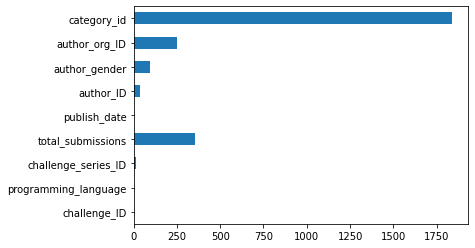

In [ ]:
challenge.isnull().sum().plot(kind='barh')

- Insights
  - category id column have more no of missing values
  - Here  total_submissions are numeric features will fill them by mean values
  - however  author_ID, author_gender, author_org_ID,challenge_series_ID,category_id are categorical features will fill them by mode values

In [ ]:
challenge.columns

Index(['challenge_ID', 'programming_language', 'challenge_series_ID',
       'total_submissions', 'publish_date', 'author_ID', 'author_gender',
       'author_org_ID', 'category_id'],
      dtype='object')

In [ ]:
challenge['total_submissions'] = challenge['total_submissions'].fillna(challenge['total_submissions'].mean())

In [ ]:
categorical_features = ['challenge_series_ID',
        'author_ID', 'author_gender',
       'author_org_ID', 'category_id']

In [ ]:
challenge[categorical_features] = challenge[categorical_features].apply(lambda x:x.fillna(x.mode()[0]))

In [ ]:
challenge.isnull().sum()

challenge_ID            0
programming_language    0
challenge_series_ID     0
total_submissions       0
publish_date            0
author_ID               0
author_gender           0
author_org_ID           0
category_id             0
dtype: int64

## 4.EDA on the data

### 4.1 EDA on the challenge dataset

In [ ]:
challenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   challenge_ID          5606 non-null   object 
 1   programming_language  5606 non-null   int64  
 2   challenge_series_ID   5606 non-null   object 
 3   total_submissions     5606 non-null   float64
 4   publish_date          5606 non-null   object 
 5   author_ID             5606 non-null   object 
 6   author_gender         5606 non-null   object 
 7   author_org_ID         5606 non-null   object 
 8   category_id           5606 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 394.3+ KB


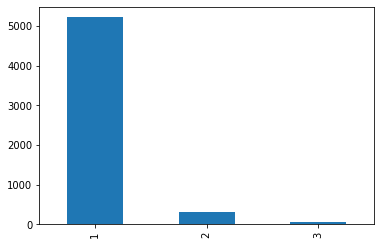

In [ ]:
challenge['programming_language'].value_counts().plot(kind='bar')

- Most of the challenges are from programming language 1
- programming language 3 having less number of challenges

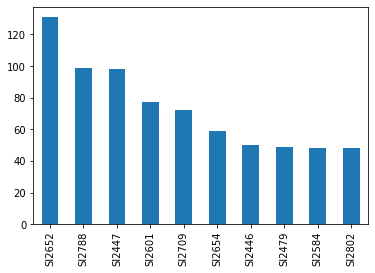

In [ ]:
challenge['challenge_series_ID'].value_counts().nlargest(10).plot(kind='bar')

- challenge series id is the category given to the challenge dataset
- My assumption it represents same problem but with higher difficuly. like sorting algorithm...followed by its no of problems
- the series ID SI2652 have more no. of challenges (137)

In [ ]:
challenge.groupby('challenge_series_ID')['total_submissions'].sum().nlargest(10)

challenge_series_ID
SI2545    80898.000000
SI2634    79013.000000
SI2468    54842.000000
SI2677    51200.000000
SI2709    50706.000000
SI2556    43672.000000
SI2501    35445.000000
SI2482    30827.000000
SI2469    29558.000000
SI2652    27710.450324
Name: total_submissions, dtype: float64

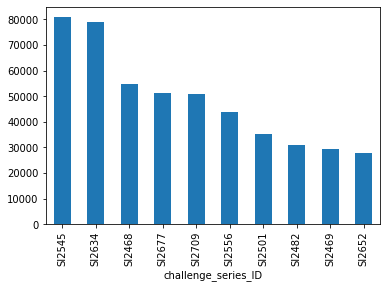

In [ ]:
challenge.groupby('challenge_series_ID')['total_submissions'].sum().nlargest(10).plot(kind='bar')

SI2545    80898.000000<br>
SI2634    79013.000000<br>
SI2468    54842.000000<br>
SI2677    51200.000000 <br>
top submissions paid by this challenge_series_ids

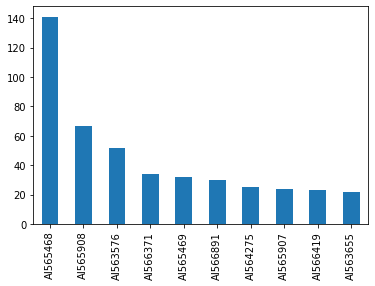

In [ ]:
challenge['author_ID'].value_counts().nlargest(10).plot(kind='bar')

In [ ]:
challenge['author_ID'].value_counts().nlargest(10)

AI565468    141
AI565908     67
AI563576     52
AI566371     34
AI565469     32
AI566891     30
AI564275     25
AI565907     24
AI566419     23
AI563655     22
Name: author_ID, dtype: int64

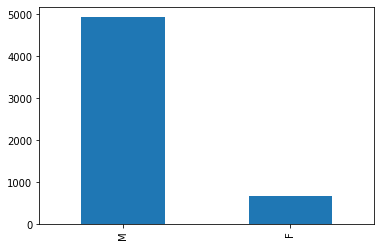

In [ ]:
challenge['author_gender'].value_counts().plot(kind='bar')

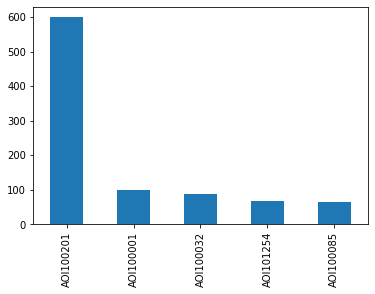

In [ ]:
challenge['author_org_ID'].value_counts().nlargest(5).plot(kind='bar')

- AI565468 author with this ID created 140 challenges
- most of the authors are Males
- most of the authors are from A0I100201 organization almost 600 authors

### 4.2 EDA on the training and testing Dataset

Top 10 challenges that users liked most

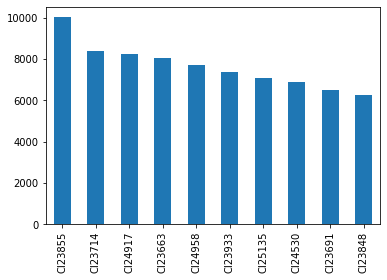

In [ ]:
train['challenge'].value_counts().nlargest(10).plot(kind='bar')

In [ ]:
train[train['challenge_sequence']==1]['challenge'].value_counts().nlargest(10)

CI23855    3397
CI23663    2856
CI23714    2591
CI23933    1748
CI24917    1298
CI23691    1290
CI23667    1242
CI23648    1237
CI23612    1133
CI23769    1078
Name: challenge, dtype: int64

In [ ]:
train[train['challenge_sequence']==2]['challenge'].value_counts().nlargest(10)

CI24917    1985
CI23855    1351
CI24530    1133
CI23933    1123
CI23975     898
CI24915     825
CI24958     789
CI24527     675
CI25135     671
CI24261     660
Name: challenge, dtype: int64

this are the top challenges which user have selected among the most challenge sequences

### 4.3 EDA on the training and challenge dataset after merging

In [ ]:
challenge = challenge.rename(columns={'challenge_ID':'challenge'})
challenge['publish_year'] = pd.DatetimeIndex(challenge['publish_date']).year
train_challenge = pd.merge(train,challenge,on=["challenge"],how="left")

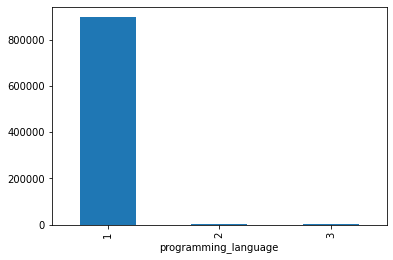

In [ ]:
train_challenge.groupby('programming_language')['user_id'].count().plot(kind='bar')

In [ ]:
train_challenge.groupby('programming_language')['user_id'].count()

programming_language
1    897915
2      3036
3      2965
Name: user_id, dtype: int64

- Most of the users like challenges with programming language as 1

In [ ]:
train_challenge.groupby('challenge_series_ID')['user_id'].count().nlargest(10)

challenge_series_ID
SI2678    78588
SI2634    50071
SI2545    46643
SI2556    44965
SI2501    34312
SI2468    32974
SI2469    29578
SI2694    28937
SI2541    27867
SI2472    26112
Name: user_id, dtype: int64

- Challenge series with ID SI2678 have highest number of counts where most of the users interested

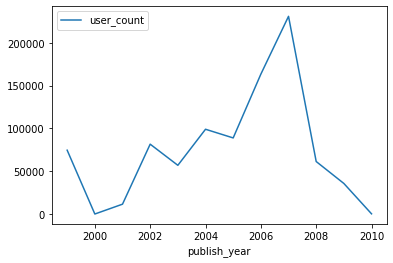

In [ ]:
train_challenge.groupby('publish_year')['user_id'].count().reset_index().sort_values(by=['publish_year'],ascending=False).rename(columns={'user_id':'user_count'})[['publish_year','user_count']].plot(x='publish_year')

In [ ]:
train_challenge.groupby('publish_year')['user_id'].count().sort_values(ascending=False)

publish_year
2007    230882
2006    163367
2004     99004
2005     88875
2002     81582
1999     74544
2008     61320
2003     56899
2009     35687
2001     11505
2010       231
2000        20
Name: user_id, dtype: int64

- challenges which are published in 2007, 2006, 2004, 2005 are the most liked challenges 

## 5.Data Preprocessing after EDA

#### 5.1 LabelEncoding to the categorical variables

In [ ]:
le =LabelEncoder()
challenge["challenge_series_ID"] = le.fit_transform(challenge["challenge_series_ID"].astype(str))
challenge["total_submissions"] = challenge["total_submissions"].fillna(challenge["total_submissions"].mean()).astype(int)
challenge["category_id"] = challenge["category_id"].fillna(challenge["category_id"].mean()).astype(int)

#### 5.2 Taking year attribute out of publish date

In [ ]:
challenge['publish_date'] = pd.DatetimeIndex(challenge['publish_date']).year

#### 5.3 Merging test and train dataset with challenge dataset

In [ ]:
combine_set=pd.concat([train,test], ignore_index=True)
mer_train = pd.merge(train,challenge,on=["challenge"],how="left")
mer_test = pd.merge(test,challenge,on=["challenge"],how="left")
mer_df = mer_train.append(mer_test).reset_index(drop=True)

##6.Modelling

#### 6.1 Simple modelling and using cosine similarity to find the recommendation Using NearestNeighbours (Item to Item similary here our Item is Challenge_ID's) 



- I took challenge_sequence as rating for my recommendation

In [ ]:
total_data = mer_df.pivot_table(index='challenge',columns='user_id',values='challenge_sequence').fillna(0)

In [ ]:
from scipy.sparse import csr_matrix
total_data_matrix = csr_matrix(total_data.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm = 'brute')
model_knn.fit(total_data_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

- below function will give the cosine similarity distance between the two challenges

In [ ]:
def distance_func(total_data, distances,indices):
  every = {}
  for i in range(0, len(distances.flatten())):
      if i == 0:
        pass
      else:
        every[total_data.index[indices.flatten()[i]]] = distances.flatten()[i]
  return every

- we will calculate the distance between the items i.e. challenge Id's

In [ ]:
all_s = {}
for i in total_data.index:
    distances, indices = model_knn.kneighbors(total_data.loc[i].values.reshape(1, -1), n_neighbors = 10)
    data = distance_func(total_data, distances,indices)
    all_s[i] = data

- below code is written to take the user_ids from the test dataset and suggesting the best challenge_IDS
- this will give the challenge_sequence 11,12,13 which we want to generate for the user

In [ ]:
final_df = pd.DataFrame(columns=['user_sequence','challenge'])
counter = 0
for user_id in test.user_id.unique():
  challenge_ids_of_user = test[test.user_id==user_id]['challenge']
  all_sss = {}
  for i in challenge_ids_of_user:
    # distances, indices = model_knn.kneighbors(total_data_train.loc[i].values.reshape(1, -1), n_neighbors = 4)
    # data = distance_func(total_data_train, distances,indices)
    if i in all_s:
      data = all_s[i]
      for key, value in data.items():
        if key in all_sss:
          if value < all_sss[key]:
            all_sss.update({key:value})
        else:
          all_sss.update({key:value})
      # all_sss.update(data)
  for i in challenge_ids_of_user:
    if i in all_sss:
      del all_sss[i]
  challenges = [*dict(sorted(all_sss.items(), key=lambda x:x[1])[:3])]
  if len(challenges) == 0:
    final_df.loc[counter,:] = str(user_id)+'_11', '0'
    final_df.loc[counter+1,:] = str(user_id)+'_12', '0'
    final_df.loc[counter+2,:] = str(user_id)+'_13', '0'
    counter += 3
    continue
  if len(challenges) != 3:
    for i in range(3):
      challenges.append(challenges[0])
  
  final_df.loc[counter,:] = str(user_id)+'_11', challenges[0]
  final_df.loc[counter+1,:] = str(user_id)+'_12', challenges[1]
  final_df.loc[counter+2,:] = str(user_id)+'_13', challenges[2]
  counter += 3

- this will contain all the user_sequence 11,12,13 and recommended challenge ids

In [ ]:
final_df.to_csv('submit.csv', index=False)

- The Score which I got from submitting above code is **0.131606060606061**
- then I used challenge_sequence-13 as rating feature for the dataset which gave me around score of **0.1351565657**

### 6.2 Used Turicreate for the recommendation system Item-Item

In [ ]:
!pip install turicreate

In [ ]:
import turicreate as tc
tc.config.set_num_gpus(1)

- Before passing the data to turicreate we need to convert it the SFrame(turicreate dataframe)

In [ ]:
# user_df and challenge_df is the data which we will pass to the turicreate which will extract features and use it further to increase recommendation
user_data = mer_df.groupby("user_id")["challenge_series_ID"].agg(lambda x: pd.Series.mode(x)[0]).to_frame()
user_data = user_data.reset_index()
user_data = tc.SFrame(user_data)
challenge_data = tc.SFrame(challenge)

In [ ]:
combine_set_tc=tc.SFrame(combine_set)
m=tc.item_similarity_recommender.create(combine_set_tc, user_id='user_id',
                                                            item_id='challenge',
                                                            target='challenge_sequence',
                                                            user_data=user_data,
                                                            item_data = challenge_data,
                                                            similarity_type = "cosine",
                                                            )

Warning: Ignoring columns user_sequence;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 1301236 observations with 109264 users and 5606 items.

Data prepared in: 1.29154s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 945us                          | 0.75       |

| 46.78ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 95.471ms                            | 0                | 0               |

| 525.897ms                           | 100              | 5606            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.68598s

- get the best 3 recommendations for the user 

In [ ]:
results = m.recommend(test["user_id"].unique().tolist(),k=3)["challenge"]

recommendations finished on 1000/39732 queries. users per second: 19861.4

recommendations finished on 2000/39732 queries. users per second: 19019.5

recommendations finished on 3000/39732 queries. users per second: 19149.1

recommendations finished on 4000/39732 queries. users per second: 19291.7

recommendations finished on 5000/39732 queries. users per second: 19390.7

recommendations finished on 6000/39732 queries. users per second: 19400.4

recommendations finished on 7000/39732 queries. users per second: 19404.7

recommendations finished on 8000/39732 queries. users per second: 19425.6

recommendations finished on 9000/39732 queries. users per second: 19410.4

recommendations finished on 10000/39732 queries. users per second: 19377.4

recommendations finished on 11000/39732 queries. users per second: 19203.1

recommendations finished on 12000/39732 queries. users per second: 19212.2

recommendations finished on 13000/39732 queries. users per second: 19218.6

recommendations finished on 14000/39732 queries. users per second: 19138.7

recommendations finished on 15000/39732 queries. users per second: 19121.3

recommendations finished on 16000/39732 queries. users per second: 19106.9

recommendations finished on 17000/39732 queries. users per second: 19127.9

recommendations finished on 18000/39732 queries. users per second: 19141.6

recommendations finished on 19000/39732 queries. users per second: 19161.2

recommendations finished on 20000/39732 queries. users per second: 19180.2

recommendations finished on 21000/39732 queries. users per second: 19195.6

recommendations finished on 22000/39732 queries. users per second: 19212.9

recommendations finished on 23000/39732 queries. users per second: 19221.7

recommendations finished on 24000/39732 queries. users per second: 19038.4

recommendations finished on 25000/39732 queries. users per second: 19036.9

recommendations finished on 26000/39732 queries. users per second: 18993.1

recommendations finished on 27000/39732 queries. users per second: 18950.6

recommendations finished on 28000/39732 queries. users per second: 18951.4

recommendations finished on 29000/39732 queries. users per second: 18955.7

recommendations finished on 30000/39732 queries. users per second: 18898.6

recommendations finished on 31000/39732 queries. users per second: 18893.1

recommendations finished on 32000/39732 queries. users per second: 18902.2

recommendations finished on 33000/39732 queries. users per second: 18906.9

recommendations finished on 34000/39732 queries. users per second: 18857.5

recommendations finished on 35000/39732 queries. users per second: 18849

recommendations finished on 36000/39732 queries. users per second: 18866

recommendations finished on 37000/39732 queries. users per second: 18882.5

recommendations finished on 38000/39732 queries. users per second: 18887.9

recommendations finished on 39000/39732 queries. users per second: 18886.5

In [ ]:
submission_sample =pd.read_csv(r'https://raw.githubusercontent.com/shrikantnarayankar15/Insaid-ML-advanced-project/master/sample_submission.csv')

submission_sample["challenge"] = np.array(results).reshape(-1,1)

submission_sample.to_csv("submit_target.csv",index=False)

- The Score which I got from submitting above code is **0.20589702538400853** around something which was higher than the models which i used earlier

## 7.Conclusion

- I have seen the recommendation system with rating but this one was new.
- I tried SVD and user-to-user collabarative system it also failed gave around 0.02 score after submission
- Learned new library Turicreate which is very usefull for the recommendation
- I saw some of the guys used NLP to predict the recommendation, In future I want to try it